# The Sparks Foundation - Data Science Internship

Task 4 : Exploratory Data Analysis -Terrorism

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data = pd.read_csv('globalterrorismdb_0718dist.csv',encoding='latin1',low_memory=True)
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 146.9+ MB


In [6]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
data.shape

(181691, 135)

In [8]:
#Checking The no of Unique Values
data.nunique()

eventid       181691
iyear             47
imonth            13
iday              32
approxdate      2244
               ...  
INT_LOG            3
INT_IDEO           3
INT_MISC           3
INT_ANY            3
related        14306
Length: 135, dtype: int64

In [10]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','provstate':'states','region_txt':'Region','country_txt': 'Country',
                      'attacktype1_txt':'AttackType','nkill':'Killed','target1':'Target','nwound':'Wounded','gname':'GroupName',
                      'targtype1_txt':'Target_type','weaptype1_txt':'Weapontype','motive':'Motive'},inplace =True)

In [14]:
data.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [16]:
#In dataf assign Some Important Columns
data =data[['Year','Month','Day','Country','states','city','Region','AttackType','latitude','longitude','Killed','Wounded','Target','summary',
             'GroupName','Target_type','Weapontype','Motive']]
data.head()

,Year,Month,Day,Country,states,city,Region,AttackType,latitude,longitude,Killed,Wounded,Target,summary,GroupName,Target_type,Weapontype,Motive
0,1970,7,2,Dominican Republic,NaN,Santo Domingo,Central America & Caribbean,Assassination,18.456792,-69.951164,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,Mexico city,North America,Hostage Taking (Kidnapping),19.371887,-99.086624,0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Unknown,Southeast Asia,Assassination,15.478598,120.599741,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Athens,Western Europe,Bombing/Explosion,37.997490,23.762728,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,Fukouka,East Asia,Facility/Infrastructure Attack,33.580412,130.396361,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [17]:
data.shape

(181691, 18)

In [18]:
data.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
states            421
city              434
Region              0
AttackType          0
latitude         4556
longitude        4557
Killed          10313
Wounded         16311
Target            636
summary         66129
GroupName           0
Target_type         0
Weapontype          0
Motive         131130
dtype: int64

In [19]:
count = 0
for i in data['Day']:
  if i==0:
    count+=1
  else:
    count=count
print("Total Number Of Days Entred as 0 :",count)

Total Number Of Days Entred as 0 : 891


In [20]:
count2 = 0
for i in data['Month']:
  if i==0:
    count2+=1
  else:
    count=count
print("Total Number Of Days Entred as 0 :",count2)

Total Number Of Days Entred as 0 : 20


In [21]:
data['Day']= dataf['Day'].apply(lambda x: np.random.randint(1,32) if x == 0 else x)
data['Month'] = dataf['Month'].apply(lambda x: np.random.randint(1,13) if x == 0 else x)

In [22]:
count = 0
for i in data['Day']:
  if i==0:
    count+=1
  else:
    count=count
print("Total Number Of Days Entred as 0 :",count)

Total Number Of Days Entred as 0 : 0


In [23]:
count2 = 0
for i in data['Month']:
  if i==0:
    count2+=1
  else:
    count=count
print("Total Number Of Days Entred as 0 :",count2)

Total Number Of Days Entred as 0 : 0


In [25]:
def null_val(data):
    null_val = data.isnull().sum()
    null_val_p = 100 * data.isnull().sum()/len(data)
    null_val_ = pd.concat([null_val, null_val_p], axis =1)
    null_val_last = null_val_.rename(columns={0:'Null Values',1:'Percentage'})
    return null_val_last
null_val(data)

,Null Values,Percentage
Year,0,0.000000
Month,0,0.000000
Day,0,0.000000
Country,0,0.000000
states,421,0.231712
city,434,0.238867
Region,0,0.000000
AttackType,0,0.000000
latitude,4556,2.507554
longitude,4557,2.508104


In [26]:
data.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
states            421
city              434
Region              0
AttackType          0
latitude         4556
longitude        4557
Killed          10313
Wounded         16311
Target            636
summary         66129
GroupName           0
Target_type         0
Weapontype          0
Motive         131130
dtype: int64

In [27]:
data['Motive'].fillna(value='NA',inplace=True)
data['summary'].fillna(value='NA',inplace=True)
data['city'].fillna(value='NA',inplace=True)
data['states'].fillna(value='NA',inplace=True)
data['longitude'].fillna(value='NA',inplace=True)
data['latitude'].fillna(value='NA',inplace=True)
data['Wounded'].fillna(value='NA',inplace=True)
data['Killed'].fillna(value='NA',inplace=True)
data['Target'].fillna(value='NA',inplace =True)

In [28]:
data.isnull().sum()

Year           0
Month          0
Day            0
Country        0
states         0
city           0
Region         0
AttackType     0
latitude       0
longitude      0
Killed         0
Wounded        0
Target         0
summary        0
GroupName      0
Target_type    0
Weapontype     0
Motive         0
dtype: int64

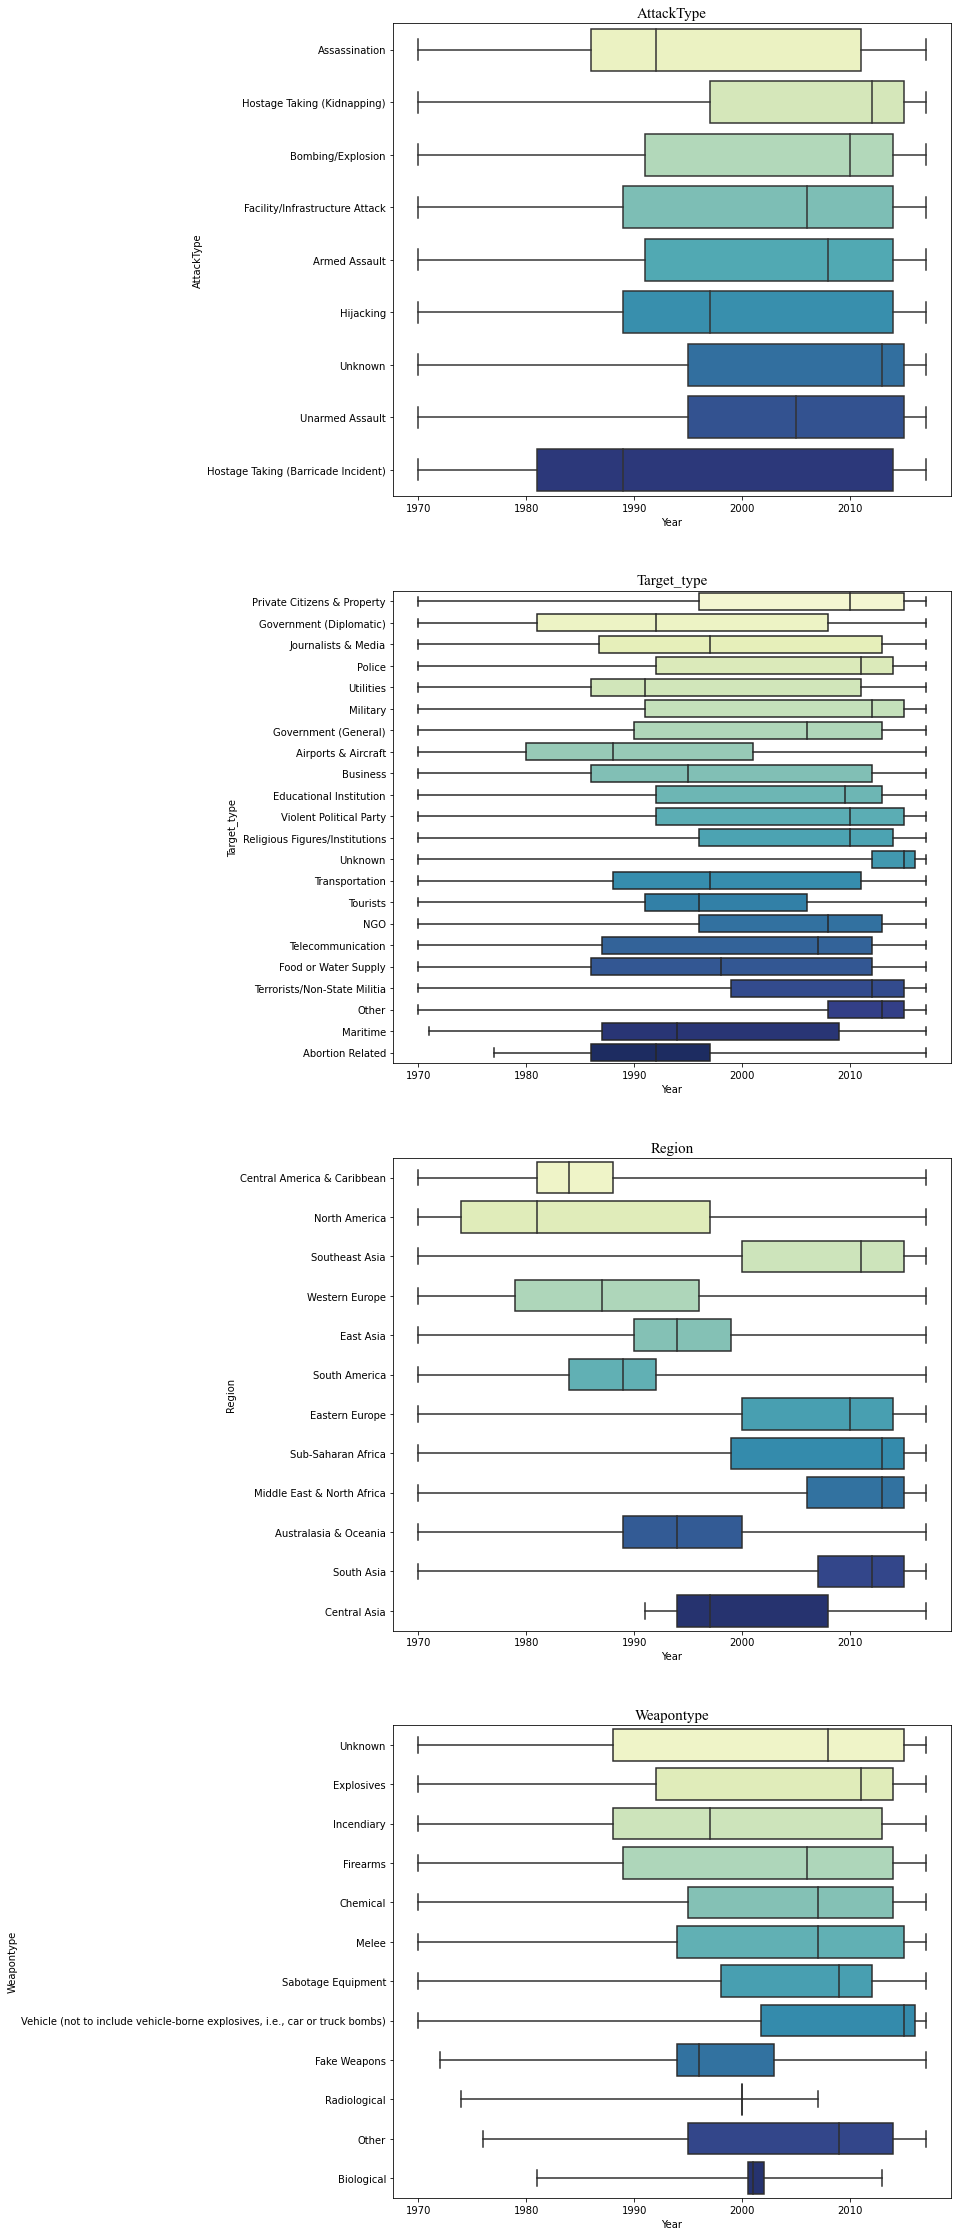

In [29]:
style ={'family':'Times New Roman','color':'black', 'size': 15}
dict = {'AttackType':1,'Target_type':2,'Region':3,'Weapontype':4}
plt.figure(figsize=(10,40))

for value, i in dict.items():
  plt.subplot(4,1,i)
  sns.boxplot(x="Year",y=value, data=dataf, whis=[0,100],palette="YlGnBu")
  plt.title(value,fontdict=style)
plt.show()

<AxesSubplot:>

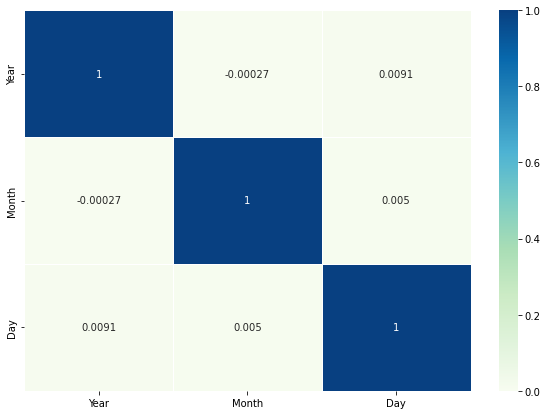

In [31]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),cmap="GnBu",annot = True, xticklabels ='auto', yticklabels='auto',linewidth=0.8)

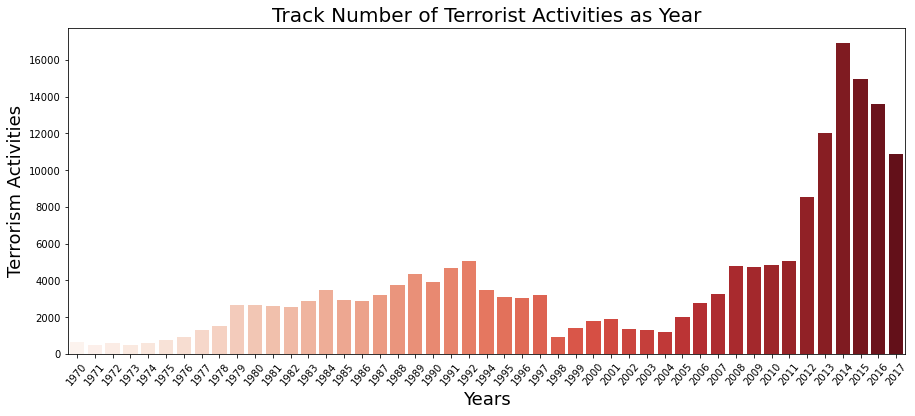

In [32]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=data,palette="Reds")
plt.xticks(rotation=50)
plt.xlabel('Years',size='18',color='black')
plt.ylabel('Terrorism Activities',size ='18',color = 'black')
plt.title('Track Number of Terrorist Activities as Year',size = '20',color = 'black')
plt.show()

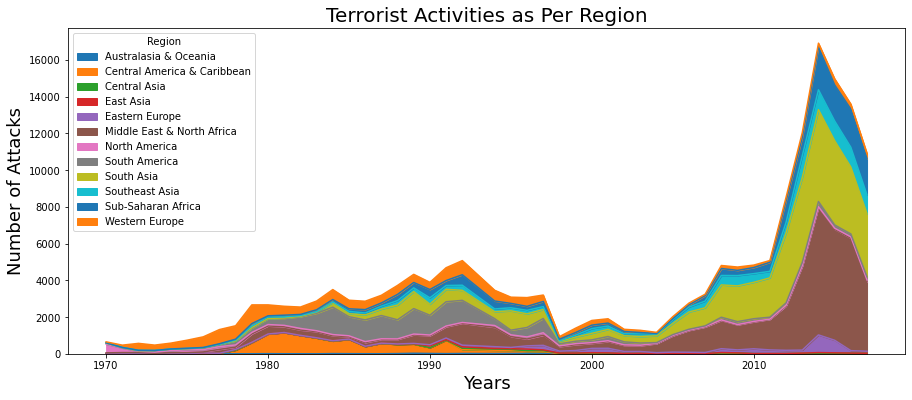

In [33]:
pd.crosstab(data.Year, data.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities as Per Region',size = '20',color = 'black')
plt.xlabel('Years',size='18',color='black')
plt.ylabel('Number of Attacks',size ='18',color = 'black')
plt.show()

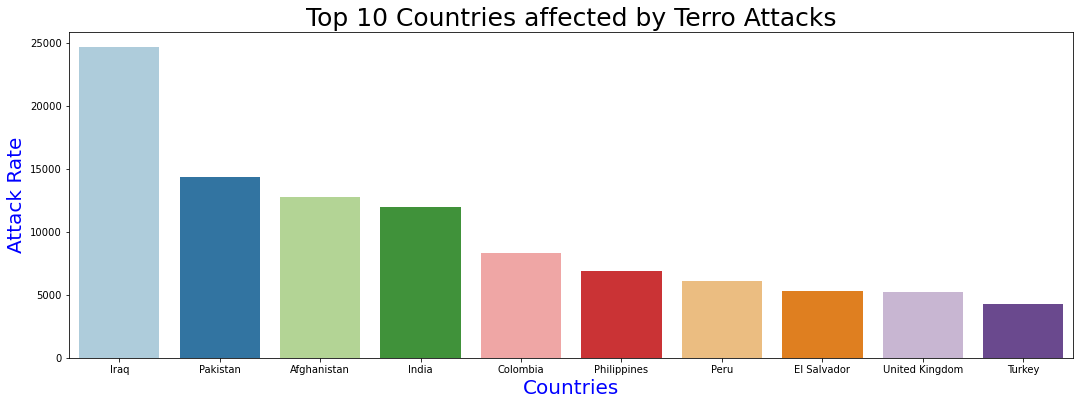

In [34]:
plt.subplots(figsize=(18,6))
plt.title('Top 10 Countries affected by Terro Attacks',size = '25', color='black')
sns.barplot(data['Country'].value_counts()[:10].index, dataf['Country'].value_counts()[:10].values,palette="Paired")
plt.xlabel('Countries',size ='20',color ='blue')
plt.ylabel('Attack Rate',size ='20',color ='blue')
plt.show()

In [35]:
weapon_used = pd.crosstab(data['Weapontype'],data['Region'])
weapon_used

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Weapontype,,,,,,,,,,,,
Biological,0,0,0,2,0,1,24,1,2,0,3,2
Chemical,11,2,2,17,12,73,26,26,83,11,12,46
Explosives,80,3149,254,333,3089,32283,1557,9098,22568,5039,6319,8657
Fake Weapons,0,0,1,4,4,6,5,3,3,0,1,6
Firearms,74,5679,232,41,1461,11877,682,6525,15169,5634,7499,3651
Incendiary,74,435,15,252,186,1181,897,1077,2285,837,840,3056
Melee,10,65,14,82,90,1227,74,131,998,147,478,339
Other,1,0,0,3,4,23,18,6,16,4,19,20
Radiological,0,0,0,10,0,0,1,0,1,0,0,2


In [36]:
print("Country with the Most Terrorist Attacks:",data['Country'].value_counts().idxmax())
print("Region with the Most Terrorist Attacks:",data['Region'].value_counts().idxmax())
print("City Have the Most Terrorist Attacks:",data['city'].value_counts().index[1])
print("Year with the Most Terrorist Attacks:",data['Year'].value_counts().idxmax())
print("Month with the Most Terrorist Attacks:",data['Month'].value_counts().idxmax())
print("Group with the Most Terrorist Attacks:",data['GroupName'].value_counts().index[1])
print("Most Target Types:",data['AttackType'].value_counts().index[1])
print("Most Target Types:",data['Target_type'].value_counts().idxmax())

Country with the Most Terrorist Attacks: Iraq
Region with the Most Terrorist Attacks: Middle East & North Africa
City Have the Most Terrorist Attacks: Baghdad
Year with the Most Terrorist Attacks: 2014
Month with the Most Terrorist Attacks: 5
Group with the Most Terrorist Attacks: Taliban
Most Target Types: Armed Assault
Most Target Types: Private Citizens & Property
